In [1]:
# pip install -q kaggle

In [ ]:
# from google.colab import files
# files.upload()

In [3]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [4]:
# !kaggle datasets download -d sankalpsrivastava26/capital-alphabets-28x28

100% 3.17G/3.17G [00:50<00:00, 32.4MB/s]
100% 3.17G/3.17G [00:50<00:00, 68.0MB/s]


In [5]:
# !unzip capital-alphabets-28x28.zip

Streaming output truncated to the last 5000 lines.
  inflating: datasetSmall/validation/t/002691.png  
  inflating: datasetSmall/validation/t/002692.png  
  inflating: datasetSmall/validation/t/002693.png  
  inflating: datasetSmall/validation/t/002694.png  
  inflating: datasetSmall/validation/t/002695.png  
  inflating: datasetSmall/validation/t/002696.png  
  inflating: datasetSmall/validation/t/002697.png  
  inflating: datasetSmall/validation/t/002698.png  
  inflating: datasetSmall/validation/t/002699.png  
  inflating: datasetSmall/validation/t/002700.png  
  inflating: datasetSmall/validation/t/002701.png  
  inflating: datasetSmall/validation/t/002702.png  
  inflating: datasetSmall/validation/t/002703.png  
  inflating: datasetSmall/validation/t/002704.png  
  inflating: datasetSmall/validation/t/002705.png  
  inflating: datasetSmall/validation/t/002706.png  
  inflating: datasetSmall/validation/t/002707.png  
  inflating: datasetSmall/validation/t/002708.png  
  inflating: 

In [6]:
# !rm capital-alphabets-28x28.zip

In [7]:
# !rm -rf datasetSmall
# !rm -rf datasetDigit

In [8]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as img
import matplotlib.pyplot as plt
import os

In [9]:
train_dir = "/content/dataset/train"
val_dir = "/content/dataset/validation"
test_dir = "/content/dataset/test"

In [10]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                batch_size=64,
                                                                image_size=(256, 256),
                                                                label_mode="categorical",
                                                                seed=0)

val_data = tf.keras.preprocessing.image_dataset_from_directory(val_dir,
                                                              batch_size=64,
                                                              image_size=(256, 256),
                                                              label_mode="categorical",
                                                              seed=0)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              batch_size=64,
                                                              image_size=(256, 256),
                                                              label_mode="categorical",
                                                              seed=0,
                                                              shuffle=False)

Found 150341 files belonging to 26 classes.
Found 43250 files belonging to 26 classes.
Found 43121 files belonging to 26 classes.


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(filters=60, kernel_size=3, activation='relu', input_shape=[256, 256, 3]),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=60, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=60, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dense(26, activation="softmax", name="output_layer")
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_history = model.fit(x=train_data, validation_data=val_data, epochs=10, steps_per_epoch=150, validation_steps=50)

Epoch 1/10
150/150 [==============================] - 69s 367ms/step - loss: 1.2226 - accuracy: 0.6576 - val_loss: 0.5664 - val_accuracy: 0.8428
Epoch 2/10
150/150 [==============================] - 53s 353ms/step - loss: 0.4651 - accuracy: 0.8707 - val_loss: 0.4219 - val_accuracy: 0.8869
Epoch 3/10
150/150 [==============================] - 53s 352ms/step - loss: 0.3829 - accuracy: 0.8982 - val_loss: 0.3747 - val_accuracy: 0.9019
Epoch 4/10
150/150 [==============================] - 53s 353ms/step - loss: 0.3316 - accuracy: 0.9111 - val_loss: 0.3600 - val_accuracy: 0.9056
Epoch 5/10
150/150 [==============================] - 53s 353ms/step - loss: 0.3032 - accuracy: 0.9214 - val_loss: 0.2927 - val_accuracy: 0.9262
Epoch 6/10
150/150 [==============================] - 53s 352ms/step - loss: 0.2768 - accuracy: 0.9264 - val_loss: 0.3095 - val_accuracy: 0.9244
Epoch 7/10
150/150 [==============================] - 53s 351ms/step - loss: 0.2706 - accuracy: 0.9279 - val_loss: 0.3014 - val_ac

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 60)      1680      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 60)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 60)      32460     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 60)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 60)        3

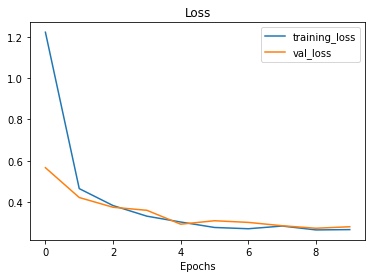

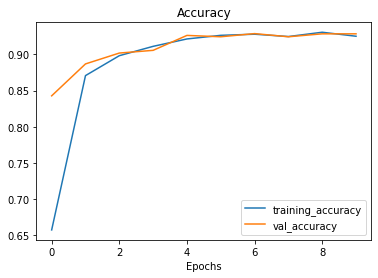

In [13]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']

epochs = range(len(model_history.history['loss']))

#Plot loss
plt.plot(epochs, loss, label='training_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

#Plot accuracy
plt.figure()
plt.plot(epochs, accuracy, label='training_accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()

In [14]:
test_loss, test_accuracy = model.evaluate(test_data)
test_loss, test_accuracy

674/674 [==============================] - 93s 137ms/step - loss: 0.2577 - accuracy: 0.9330


(0.25765517354011536, 0.9330024719238281)

In [15]:
pred_probs = model.predict(test_data, verbose=1)
print(len(pred_probs))
print(pred_probs.shape)
print(pred_probs[0])

674/674 [==============================] - 104s 153ms/step
43121
(43121, 26)
[9.9946886e-01 6.8515533e-06 2.9521988e-07 3.3197102e-06 1.0761042e-05
 1.0420798e-04 6.8125255e-06 5.2749732e-05 1.4535515e-06 1.5405509e-06
 8.8983728e-07 4.4858226e-08 1.2797860e-05 1.5933293e-06 2.3016526e-06
 3.6467307e-05 1.1920512e-05 2.7338669e-04 3.3575546e-08 1.9759345e-06
 8.1984564e-07 4.8351637e-08 1.7378119e-07 1.5303380e-07 5.3092060e-07
 6.0115852e-08]


In [16]:
print(f"Number of prediction probabilities for sample 0: {len(pred_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {pred_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: {pred_probs[0].argmax()}")

Number of prediction probabilities for sample 0: 26
What prediction probability sample 0 looks like:
 [9.9946886e-01 6.8515533e-06 2.9521988e-07 3.3197102e-06 1.0761042e-05
 1.0420798e-04 6.8125255e-06 5.2749732e-05 1.4535515e-06 1.5405509e-06
 8.8983728e-07 4.4858226e-08 1.2797860e-05 1.5933293e-06 2.3016526e-06
 3.6467307e-05 1.1920512e-05 2.7338669e-04 3.3575546e-08 1.9759345e-06
 8.1984564e-07 4.8351637e-08 1.7378119e-07 1.5303380e-07 5.3092060e-07
 6.0115852e-08]
The class with the highest predicted probability by the model for sample 0: 0


In [17]:
pred_classes = pred_probs.argmax(axis=1)
print(pred_classes[:10])

[0 0 0 0 0 0 0 0 0 0]


In [18]:
# test_labels = []

# for images, labels in test_data.unbatch():
#   test_labels.append(labels.numpy().argmax())

# print(test_labels[:10])
# print(len(test_labels))

In [19]:
class_names = test_data.class_names
print(class_names[:10])

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']


In [20]:
# model.save('OCR_Dataset2_Upper_Simple.h5')

In [21]:
def load_and_prep_image(filename, img_shape=256, scale=True):
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  img = tf.image.grayscale_to_rgb(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

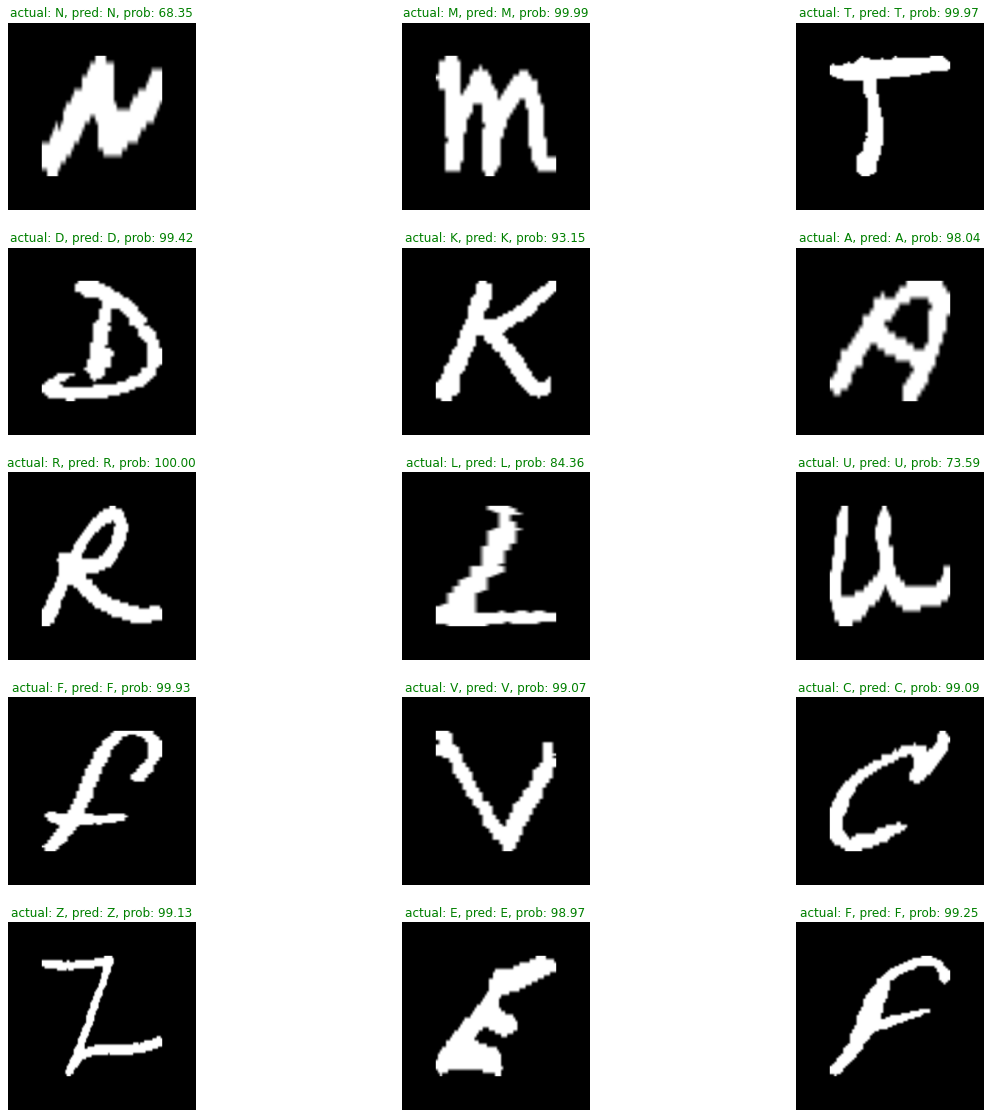

In [23]:
plt.figure(figsize=(20, 20))

for i in range(15):
  # Choose a random image from a random class 
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + '/' + class_name + "/" + filename

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class 

  # Plot the image(s)
  plt.subplot(5, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max()*100:.2f}", c=title_color)
  plt.axis(False);